<a href="https://colab.research.google.com/github/YAYAYru/AI-for-Sign-language/blob/master/examples/colab/TriggerSLDetection_LoadFiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [8]:
% reset
import os
import numpy as np
def mp_folder_exists(work_dir:str, folder_name:str):
  numpy_dir = os.path.join(work_dir, folder_name)  
  face_dir = os.path.join(numpy_dir, "face")
  left_hand_dir = os.path.join(numpy_dir, "left_hand")
  pose_dir = os.path.join(numpy_dir, "pose")
  right_hand_dir = os.path.join(numpy_dir, "right_hand")
  dirs = [face_dir, left_hand_dir, pose_dir, right_hand_dir]
  numpy_files = os.listdir(numpy_dir)
  keys = []
  resolutions = []
  if len(numpy_dir) == 0:
      print("Папка Frames пустая")
  else:
      for dir in dirs:
          dir_name = dir.split("\\")[-1]
          if os.path.exists(dir):

              print(f"папка {dir_name} найдена")
              if len(os.listdir(dir)) == 0:
                  print(f"{dir_name} пустая ")
                  dirs.remove(dir)
              else:
                  for file in os.listdir(dir):
                      key_name = ""
                      full_filename = file.split("_")
                      resolution = full_filename[1:3]
                      key_name = "_".join(full_filename[3:]).split(".")[0]
                      if key_name not in keys:
                          keys.append(key_name)

                          resolutions.append(resolution)
          else:
              print(f"папка {dir_name} не найдена")
              dirs.remove(dir)
  return keys,[face_dir,pose_dir,left_hand_dir,right_hand_dir],resolutions
# ввод
work_dir = "/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection"
folder_name = "mp_data"

# функция
keys1,dir_list1,resolutions1 = mp_folder_exists(work_dir, folder_name)

# Вывод
print(keys1[:5])
print(dir_list1)
print(resolutions1[:5])

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
папка /content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/face найдена
папка /content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/left_hand найдена
папка /content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/pose найдена
папка /content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/right_hand найдена
['1000173_3_1', '1000173_3_2', '1000177_3_1', '1000177_3_2', '1000205_3_1']
['/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/face', '/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/pose', '/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/left_hand', '/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/right_hand']
[['1920.0', '1080.0'], ['1920.0', '1080.0'], ['1920.0', '1080.0'], ['1920.0', '1080.0'], ['1920.0', '1080.0']]


In [9]:
%reset
import os
import numpy as np
def get_mediapipe_models_from_filenpy(keys,dir_list):
  face_dir,pose_dir,left_hand_dir,right_hand_dir = dir_list[0],dir_list[1],dir_list[2],dir_list[3]
  file_dict = dict()
  face = []
  left = []
  right = []
  pose = []
  # print(keys)
  for key in keys:
      # read face
      for f in os.listdir(face_dir):
          if key in f:
              np_path = os.path.join(face_dir, f)
              data = np.load(np_path)
              face = data
      # read pose
      for f in os.listdir(pose_dir):
          if key in f:
              np_path = os.path.join(pose_dir, f)
              data = np.load(np_path)
              pose = data
      # read l hand
      for f in os.listdir(left_hand_dir):
          if key in f:
              np_path = os.path.join(left_hand_dir, f)
              data = np.load(np_path)
              left = data
      # read r hand
      for f in os.listdir(right_hand_dir):
          if key in f:
              np_path = os.path.join(right_hand_dir, f)
              data = np.load(np_path)
              right = data
      file_dict[key] = [face, pose, left, right]
  return file_dict

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [10]:
# ввод
keys2 = ['1000173_3_1', '1000173_3_2', '1000177_3_1', '1000177_3_2', '1000205_3_1']
dir_list2 = ['/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/face', '/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/pose', '/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/left_hand', '/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/right_hand']

# функция
file_dict1 = get_mediapipe_models_from_filenpy(keys2,dir_list2)

# вывод: (временные ряды, x и y, количество точек)
print("face", file_dict1[keys2[0]][0].shape)
print("pose", file_dict1[keys2[0]][1].shape)
print("left", file_dict1[keys2[0]][2].shape)
print("right", file_dict1[keys2[0]][3].shape)

type(file_dict1[keys2[0]][3][0,0,0])

face (121, 2, 468)
pose (121, 2, 33)
left (121, 2, 21)
right (121, 2, 21)


numpy.float64

In [ ]:
%reset
import os
import json

def read_json(json_filepath):
        with open(json_filepath) as json_file:
            json_object = json.load(json_file)
        return json_object

def get_frameRange(jsonF,name):
  framerange_dict = {}
  beginM = {}
  endM = {}
  k = jsonF["tags"]
  for j in k:
    if j["name"] == "EndMovement":
       endM["end"] = j["frameRange"]
    if j["name"] == "BeginMovement":
       beginM["start"] = j["frameRange"]
  framerange_dict[name] = [beginM,endM]
  return framerange_dict

def JsonParser(path):
  RangeList = []
  for f in os.listdir(path):
    # print(f)
    jsonF = read_json(f"{path}/{f}")
    RangeList.append(get_frameRange(jsonF,f.replace(".mp4.json","")))
  return RangeList

# Ввод и функция
RangeList = JsonParser("/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/WeaklyLabeledMovement/Alexey50_done/ann")
# Вывод
print(RangeList[:5])

print(RangeList[1]['4282_3_2'])
print(RangeList[1]['4282_3_2'][0]['start'][0])
print(RangeList[1]['4282_3_2'][0]['start'][1])
print(RangeList[1]['4282_3_2'][1]['end'][0])
print(RangeList[1]['4282_3_2'][1]['end'][1])

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
[{'4265_3_2': [{'start': [6, 20]}, {'end': [52, 68]}]}, {'4282_3_2': [{'start': [16, 26]}, {'end': [55, 68]}]}, {'4411_3_1': [{'start': [26, 34]}, {'end': [70, 78]}]}, {'4282_3_1': [{'start': [18, 27]}, {'end': [55, 67]}]}, {'4425_3_1': [{'start': [25, 36]}, {'end': [60, 75]}]}]
[{'start': [16, 26]}, {'end': [55, 68]}]
16
26
55
68


In [37]:
def get_frames_with_model(file_dict, dir_list2,model_type=1):
  """
  model_type=0 - face; model_type=1 - pose; model_type=2 - left hand; model_type=3 - right hand; 
  """
  model_frames_X=[]
  model_frames_Y=[]
  for filename in filenames[:1]:
      frames_sum = file_dict[filename][0].shape[0]
      types = len(file_dict[filename])# face, pose, left, right
      for i in range(frames_sum):
          X = file_dict[filename][model_type][i][0]
          Y = file_dict[filename][model_type][i][1]
          model_frames_X.append(-X)
          model_frames_Y.append(-Y)
  model_frames_X = np.array(model_frames_X)
  model_frames_Y = np.array(model_frames_Y)
  model_frames_X = np.expand_dims(model_frames_X,axis=2)
  model_frames_Y = np.expand_dims(model_frames_Y,axis=2)
  XY = np.concatenate((model_frames_X, model_frames_Y), axis=2)

  return XY

# ввод
filenames = ['1000173_3_1', '1000173_3_2', '1000177_3_1', '1000177_3_2', '1000205_3_1']
dir_list2 = ['/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/face', '/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/pose', '/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/left_hand', '/content/drive/MyDrive/lake_video/TestData_Trigger_SL_Detection/mp_data/right_hand']
# функция
file_dict = get_mediapipe_models_from_filenpy(filenames,dir_list2)

print("face shape",get_frames_with_model(file_dict, dir_list2, 0).shape)
print("pose shape",get_frames_with_model(file_dict, dir_list2, 1).shape)
print("left shape",get_frames_with_model(file_dict, dir_list2, 2).shape)
print("right shape",get_frames_with_model(file_dict, dir_list2, 3).shape)

face_from_file = get_frames_with_model(file_dict, dir_list2, 0)
pose_from_file = get_frames_with_model(file_dict, dir_list2, 1)
left_from_file = get_frames_with_model(file_dict, dir_list2, 2)
right_from_file = get_frames_with_model(file_dict, dir_list2, 3)

face shape (121, 468, 2)
pose shape (121, 33, 2)
left shape (121, 21, 2)
right shape (121, 21, 2)


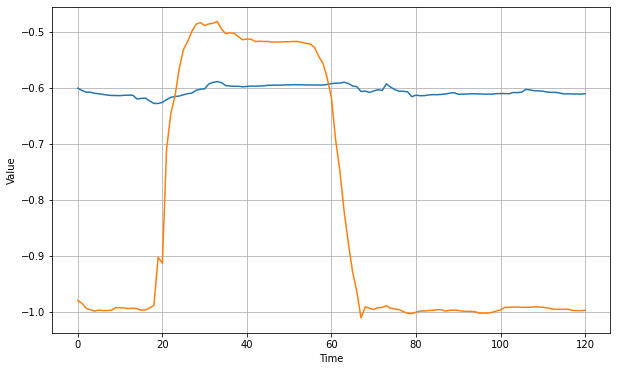

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

plt.figure(figsize=(10, 6))

plot_series(range(pose_from_file.shape[0]), pose_from_file[:,15], "-")
plt.show()

## Функция отображения визуальных выходных данных с помощью Matplotlib. И ввода входных данных - координатные данные скелетных моделей лица, позы и рук.

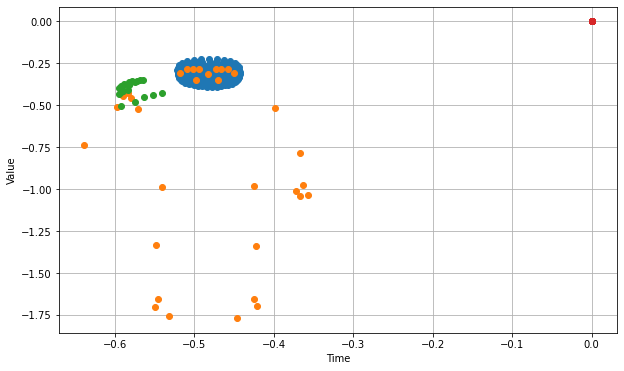

In [39]:
plt.figure(figsize=(10, 6))
fi=40
plot_series(face_from_file[fi,:,0], face_from_file[fi,:,1], "o")
plot_series(pose_from_file[fi,:,0], pose_from_file[fi,:,1], "o")
plot_series(left_from_file[fi,:,0], left_from_file[fi,:,1], "o")
plot_series(right_from_file[fi,:,0], right_from_file[fi,:,1], "o")
plt.show()

In [ ]:
%reset
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
y = np.array([[7,8,9],[10,11,12]])
x = np.expand_dims(x,axis=2)
y = np.expand_dims(y,axis=2)
xy = np.concatenate((x, y), axis=2)

print(xy.shape)
print(xy)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
(2, 3, 2)
[[[ 1  7]
  [ 2  8]
  [ 3  9]]

 [[ 4 10]
  [ 5 11]
  [ 6 12]]]
